In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('Amazon Sale Report.csv', encoding='latin1')
data.shape


(128976, 21)

In [4]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [5]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


C:\Users\prita\AppData\Local\Temp\ipykernel_25136\2772857529.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [6]:
# Example assuming dates are in "YYYY-MM-DD" format
data['Date'] = pd.to_datetime(data['Date'], format="%m-%d-%y", errors='coerce')


In [7]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month


In [8]:
# Filter out canceled orders
delivered_orders = data[data['Status'] != 'Cancelled']

# Group by Year and Month, and count the number of delivered orders
monthly_orders = delivered_orders.groupby(['Year', 'Month']).size().reset_index(name='Total Delivered Orders')

# Display the result
print(monthly_orders)


   Year  Month  Total Delivered Orders
0  2022      3                     153
1  2022      4                   41929
2  2022      5                   36166
3  2022      6                   32394


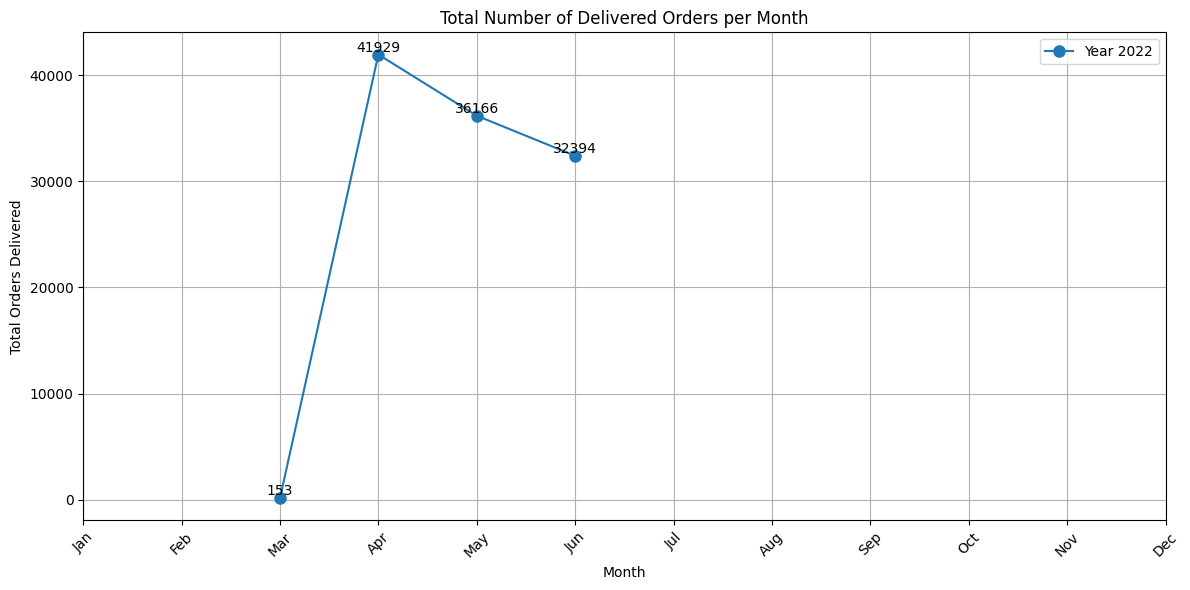

In [9]:

# Group by year and month, counting the total number of delivered orders
monthly_orders = delivered_orders.groupby(['Year', 'Month']).size()

# Create a pivot table for easier plotting (Optional)
monthly_orders_pivot = monthly_orders.unstack(fill_value=0)

# Plotting the graph
plt.figure(figsize=(12, 6))

# Plot the line with big dots for each year
for year in monthly_orders_pivot.index:
    plt.plot(monthly_orders_pivot.columns, monthly_orders_pivot.loc[year], marker='o', markersize=8, label=f'Year {year}')

# Add the values on top of each dot
for year in monthly_orders_pivot.index:
    for i, v in enumerate(monthly_orders_pivot.loc[year]):
        plt.text(monthly_orders_pivot.columns[i], v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

# Set the labels and title
plt.title('Total Number of Delivered Orders per Month')
plt.xlabel('Month')
plt.ylabel('Total Orders Delivered')

# Customize the x-axis with month names and rotate the labels
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Show grid for better readability
plt.grid(True)

# Show the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [10]:
# Filter data to exclude canceled orders
filtered_data = data[data['Status'] != 'Cancelled']

# Filter specific category, like 'Sports Shirt'
category_data = filtered_data[filtered_data['Category'] == 'Sports Shirt']


In [11]:
# Group by 'ship-city', 'Category', and 'Month', then count the orders
orders_by_city_category = category_data.groupby(['ship-city', 'Month']).size().reset_index(name='Total Orders')

# Sort the data by 'Total Orders' in descending order for better visualization
orders_by_city_category_sorted = orders_by_city_category.sort_values(by='Total Orders', ascending=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


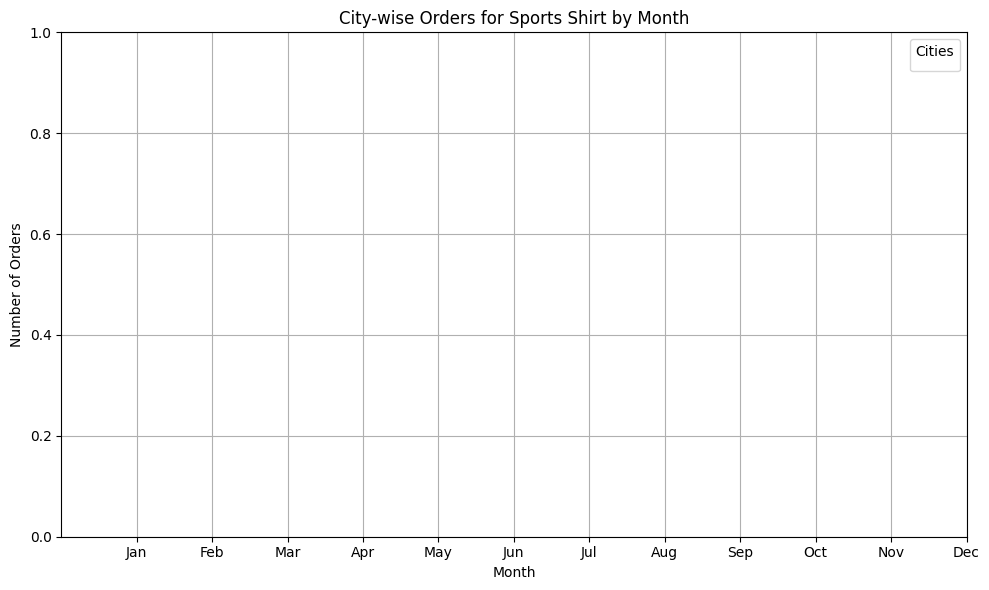

In [12]:
import matplotlib.pyplot as plt

# Filter data to exclude canceled orders and focus on a specific category (e.g., "Sports Shirt")
filtered_data = data[data['Status'] != 'Cancelled']
category_data = filtered_data[filtered_data['Category'] == 'Sports Shirt']

# Group the data by 'ship-city', 'Month', and count the orders
orders_by_city_category = category_data.groupby(['ship-city', 'Month']).size().reset_index(name='Total Orders')

# Sort the data by 'Total Orders' in descending order
orders_by_city_category_sorted = orders_by_city_category.sort_values(by='Total Orders', ascending=False)

# Plotting the graph
plt.figure(figsize=(10, 6))

# For each city, plot the number of orders over the months
for city in orders_by_city_category_sorted['ship-city'].unique():
    city_data = orders_by_city_category_sorted[orders_by_city_category_sorted['ship-city'] == city]
    plt.plot(city_data['Month'], city_data['Total Orders'], marker='o', label=city)

# Formatting the plot
plt.title('City-wise Orders for Sports Shirt by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Cities")  # Add a legend with city names
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
print(orders_by_city_category_sorted)


Empty DataFrame
Columns: [ship-city, Month, Total Orders]
Index: []


In [14]:
# Filter data to exclude canceled orders
filtered_data = data[data['Status'] != 'Cancelled']

# Filter specific category, like 'Sports Shirt'
category_data = filtered_data[filtered_data['Category'] == 'Sports Shirt']


In [15]:
# Group by 'ship-city', 'Category', and 'Month', then count the orders
orders_by_city_category = category_data.groupby(['ship-city', 'Month']).size().reset_index(name='Total Orders')

# Sort the data by 'Total Orders' in descending order for better visualization
orders_by_city_category_sorted = orders_by_city_category.sort_values(by='Total Orders', ascending=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


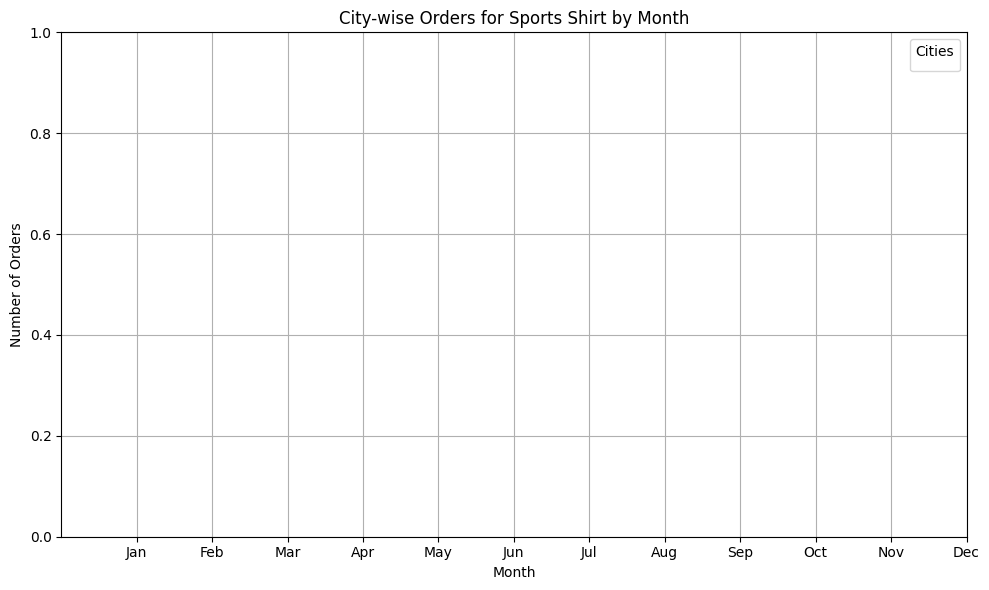

In [16]:
import matplotlib.pyplot as plt

# Plotting the graph
plt.figure(figsize=(10, 6))
for city in orders_by_city_category_sorted['ship-city'].unique():
    city_data = orders_by_city_category_sorted[orders_by_city_category_sorted['ship-city'] == city]
    plt.plot(city_data['Month'], city_data['Total Orders'], marker='o', label=city)

# Formatting the plot
plt.title('City-wise Orders for Sports Shirt by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Cities")
plt.grid(True)
plt.tight_layout()
plt.show()


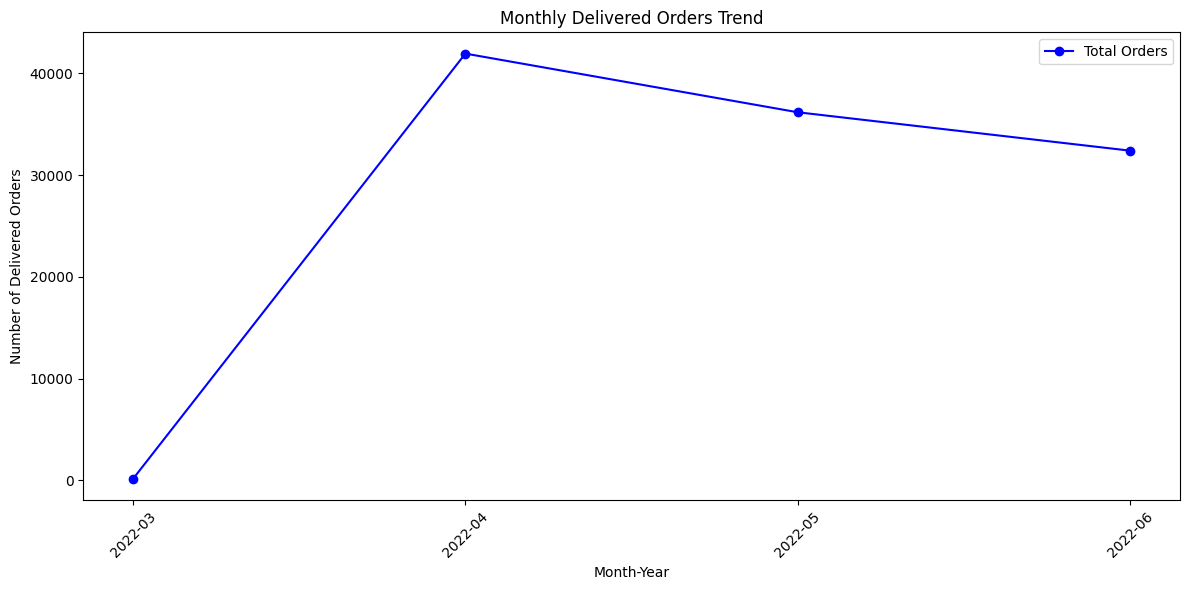

In [17]:
# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Filter for only delivered orders (excluding cancellations)
delivered_orders = data[data['Status'] != 'Cancelled'].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Add Year and Month as separate columns
delivered_orders.loc[:, 'Year'] = delivered_orders['Date'].dt.year
delivered_orders.loc[:, 'Month'] = delivered_orders['Date'].dt.month

# Combine Year and Month into a single 'YearMonth' column
delivered_orders.loc[:, 'YearMonth'] = delivered_orders['Date'].dt.to_period('M').astype(str)

# Group by 'YearMonth' and count the total orders
monthly_orders = delivered_orders.groupby('YearMonth').size().reset_index(name='Total Orders')

# Plotting the monthly orders
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_orders['YearMonth'], 
    monthly_orders['Total Orders'], 
    marker='o', color='b', linestyle='-', label="Total Orders"
)
plt.xlabel('Month-Year')
plt.ylabel('Number of Delivered Orders')
plt.title('Monthly Delivered Orders Trend')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


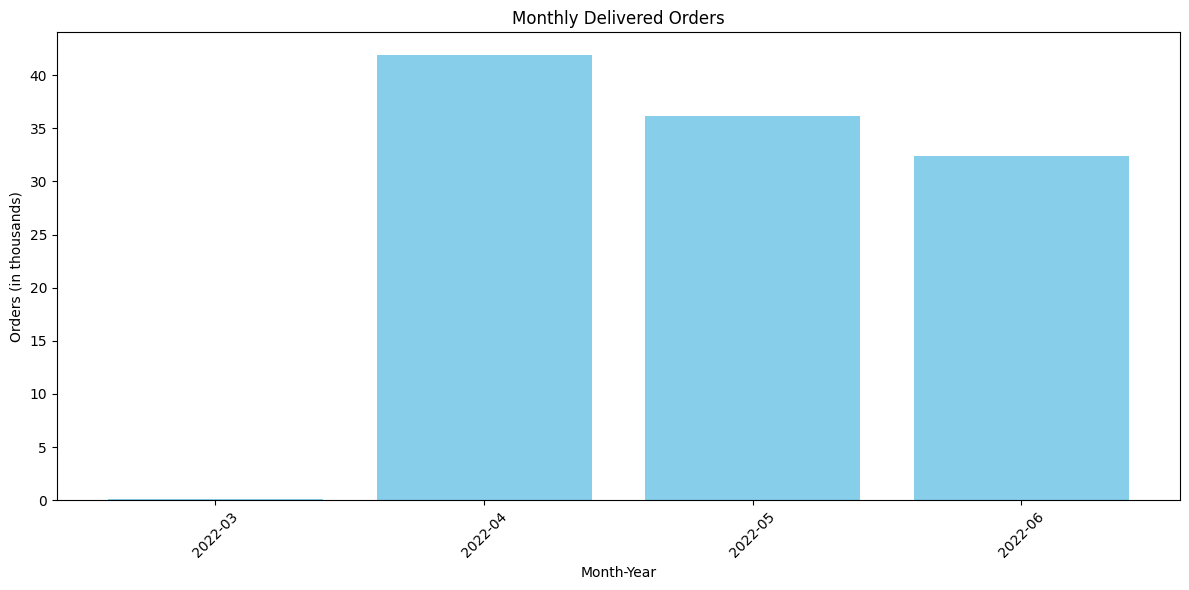

In [18]:
# CONVERTING ABOVE GRAPH TO BAR GRAPH
# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Filter out cancelled orders
delivered_orders = data[data['Status'] != 'Cancelled'].copy()

# Add columns for year and month
delivered_orders['Year'] = delivered_orders['Date'].dt.year
delivered_orders['Month'] = delivered_orders['Date'].dt.month
delivered_orders['YearMonth'] = delivered_orders['Date'].dt.to_period('M').astype(str)

# Group by 'YearMonth' and count orders
monthly_orders = delivered_orders.groupby('YearMonth').size().reset_index(name='Total Orders')

# Determine an appropriate unit for the y-axis scale
max_orders = monthly_orders['Total Orders'].max()
if max_orders > 10000:
    unit = 1000
    unit_label = "Orders (in thousands)"
elif max_orders > 5000:
    unit = 500
    unit_label = "Orders (in 500s)"
else:
    unit = 100
    unit_label = "Orders (in hundreds)"

# Scale 'Total Orders' by the chosen unit
monthly_orders['Scaled Orders'] = monthly_orders['Total Orders'] / unit

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(
    monthly_orders['YearMonth'], 
    monthly_orders['Scaled Orders'], 
    color='skyblue'
)
plt.xlabel('Month-Year')
plt.ylabel(unit_label)
plt.title('Monthly Delivered Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
# Filter for delivered (non-cancelled) orders
delivered_orders = data[data['Status'] != 'Cancelled']

# Add columns for 'Year' and 'Month' if not already present
# Add 'Year' column
delivered_orders.loc[:, 'Year'] = delivered_orders['Date'].dt.year

# Add 'Month' column
delivered_orders.loc[:, 'Month'] = delivered_orders['Date'].dt.month


# Group by 'Category', 'Year', and 'Month' to calculate monthly revenue
revenue_per_category_month = delivered_orders.groupby(['Category', 'Year', 'Month'])['Amount'].sum().reset_index()

# Combine 'Year' and 'Month' into a single 'YearMonth' column for easy plotting
revenue_per_category_month['YearMonth'] = pd.to_datetime(revenue_per_category_month[['Year', 'Month']].assign(DAY=1))

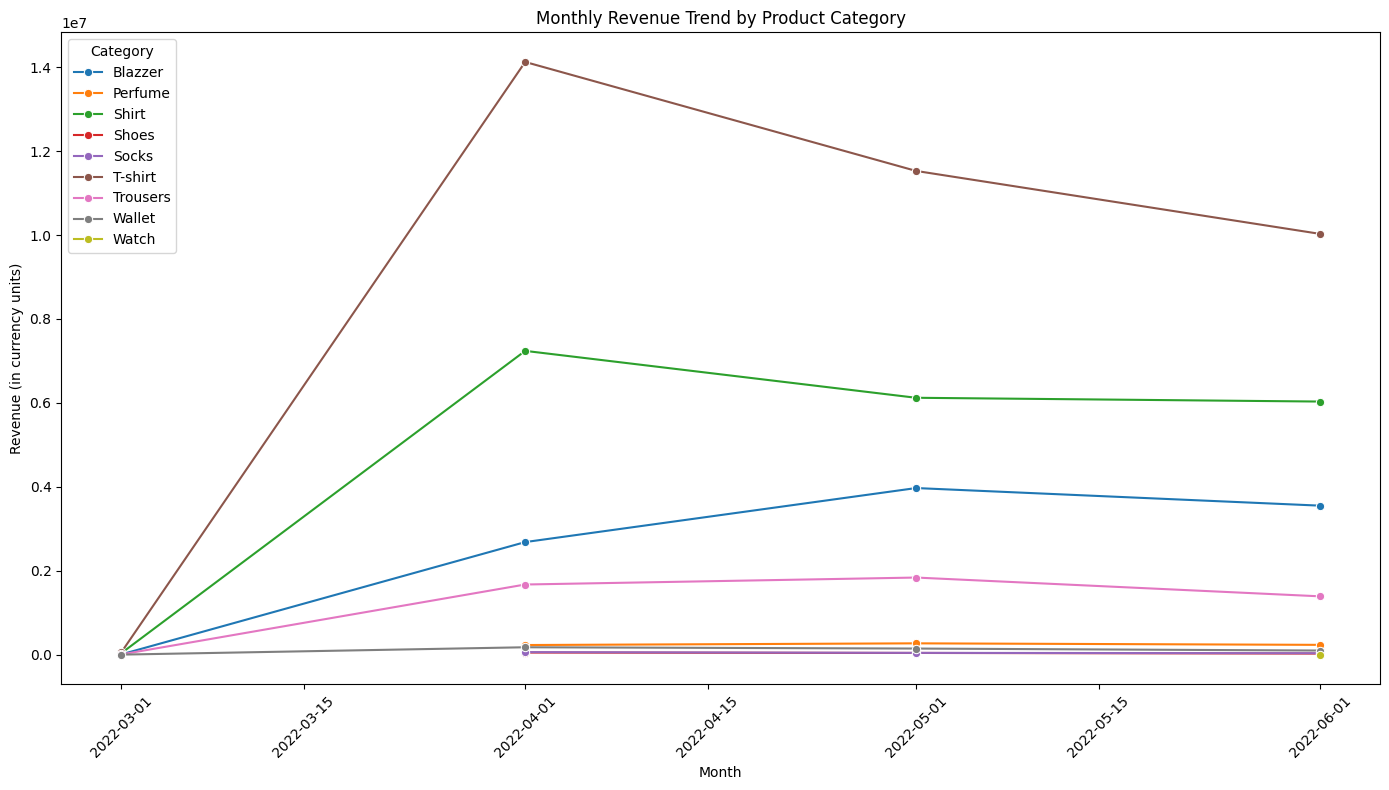

In [21]:
# Set plot style
plt.figure(figsize=(14, 8))

# Use seaborn to plot multiple lines for each category
sns.lineplot(
    data=revenue_per_category_month,
    x='YearMonth',
    y='Amount',
    hue='Category',
    marker='o'
)

# Formatting the plot
plt.title('Monthly Revenue Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Revenue (in currency units)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
